# Pré-processamento
- Baixar e carregar/abrir o dataset ERENO-2.0-100K.csv
- Verificar valores, colunas x linhas
- Verificar dados faltantes, nulos e não númericos
- Remover valores não importantes para modelos de Inteligência Artificial
- Verificar valores repetidos

# Import

In [ ]:
import pandas as pd


# To use GPU in Colab

In [ ]:
# https://saturncloud.io/blog/how-to-activate-gpu-computing-in-google-colab/
#
# Go to Menu > Runtime > Change runtime.
# Change hardware acceleration to GPU.
!nvidia-smi


Sun Jul  6 01:19:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Download dataset

In [ ]:
!pip install gdown


In [ ]:
# https://drive.google.com/file/d/1Il9YL3cOv8ret1NPoDVITSEbwRyaNoRV
!gdown 1Il9YL3cOv8ret1NPoDVITSEbwRyaNoRV


Downloading...
From (original): https://drive.google.com/uc?id=1Il9YL3cOv8ret1NPoDVITSEbwRyaNoRV
From (redirected): https://drive.google.com/uc?id=1Il9YL3cOv8ret1NPoDVITSEbwRyaNoRV&confirm=t&uuid=f5bdc0c7-78db-4ea5-a596-10e8892c0baa
To: /content/ERENO-2.0-100K.csv
100% 125M/125M [00:01<00:00, 81.8MB/s]


In [ ]:
# Check MD5sum
# 71c254079ed1261ccbbc3af69a29e354 ERENO-2.0-100K.csv
!md5sum ERENO-2.0-100K.csv


71c254079ed1261ccbbc3af69a29e354  ERENO-2.0-100K.csv


## Open original dataset

In [ ]:
df = pd.read_csv("ERENO-2.0-100K.csv")

print(f"\n{df.shape = }")
print(f"\n{df.dtypes = }")


/tmp/ipython-input-5-2262122595.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ERENO-2.0-100K.csv")



df.shape = (200052, 52)

df.dtypes = Time                       object
isbA                       object
isbB                       object
isbC                       object
vsbA                       object
vsbB                       object
vsbC                       object
isbARmsValue               object
isbBRmsValue               object
isbCRmsValue               object
vsbARmsValue               object
vsbBRmsValue               object
vsbCRmsValue               object
isbATrapAreaSum            object
isbBTrapAreaSum            object
isbCTrapAreaSum            object
vsbATrapAreaSum            object
vsbBTrapAreaSum            object
vsbCTrapAreaSum           float64
t                         float64
GooseTimestamp            float64
SqNum                     float64
StNum                     float64
cbStatus                  float64
frameLen                  float64
ethDst                     object
ethSrc                     object
ethType                    object
gooseTimeA

In [ ]:
df.head(10)


,Time,isbA,isbB,isbC,vsbA,vsbB,vsbC,isbARmsValue,isbBRmsValue,isbCRmsValue,...,sqDiff,gooseLengthDiff,cbStatusDiff,apduSizeDiff,frameLengthDiff,timestampDiff,tDiff,timeFromLastChange,delay,class
0,0.03885,-0.026538,-0.035877,0.060486,-0.039338,0.077393,-0.038062,0.029459,0.025651,0.029991,...,0.0,0.0,0.0,0.0,0.0,0.005068,0.000000,0.022390,0.000130,grayhole
1,0.03885,-0.026538,-0.035877,0.060486,-0.039338,0.077393,-0.038062,0.029459,0.025651,0.029991,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.022390,0.000130,normal
2,0.37464,0.029923,-0.076646,0.045858,-0.095898,0.055355,0.040523,0.048988,0.053399,0.052915,...,86.0,0.0,1.0,0.0,0.0,0.335783,97.634223,-97.276050,0.000123,injection
3,0.50337,0.432347,-0.113172,-0.138316,0.014902,0.082498,-0.079844,0.154143,0.057803,0.062056,...,-67.0,0.0,1.0,0.0,0.0,0.128662,6302.515166,-6399.662553,0.000055,high_StNum
4,0.7602,0.106018,-0.152017,0.015963,-0.070272,-0.022661,0.092251,0.110327,0.108409,0.071887,...,42.0,0.0,0.0,0.0,0.0,0.256906,519.062125,-6918.467772,0.000131,high_StNum
5,0.78141,0.106301,0.049578,-0.10899,0.073589,-0.089856,0.015697,0.10848,0.108404,0.073115,...,-61.0,0.0,0.0,0.0,0.0,0.021238,-6919.211513,0.764979,0.000159,random_replay
6,0.78519,-0.098127,0.148952,-0.028802,0.072359,0.0209,-0.09283,0.108176,0.107085,0.073509,...,31.0,0.0,0.0,0.0,0.0,0.003723,98.044752,-97.276050,0.000103,high_StNum
7,0.91959,-0.129034,0.12632,0.014577,0.039259,0.056991,-0.095855,0.10851,0.107488,0.07325,...,33.0,0.0,0.0,0.0,0.0,0.134475,0.134371,-97.275946,0.000177,high_StNum
8,1.0399,0.000134,-0.056456,0.05473,-0.062955,0.07207,-0.009127,0.028088,0.027939,0.03257,...,-63.0,0.0,0.0,0.0,0.0,0.120219,-98.179124,1.023396,0.000086,normal
9,1.0399,0.000134,-0.056456,0.05473,-0.062955,0.07207,-0.009127,0.028088,0.027939,0.03257,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.023396,0.000086,grayhole


# Analyze dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200052 entries, 0 to 200051
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    200052 non-null  object 
 1   isbA                    200010 non-null  object 
 2   isbB                    200005 non-null  object 
 3   isbC                    200001 non-null  object 
 4   vsbA                    200001 non-null  object 
 5   vsbB                    200001 non-null  object 
 6   vsbC                    200001 non-null  object 
 7   isbARmsValue            200001 non-null  object 
 8   isbBRmsValue            200001 non-null  object 
 9   isbCRmsValue            200000 non-null  object 
 10  vsbARmsValue            200000 non-null  object 
 11  vsbBRmsValue            200000 non-null  object 
 12  vsbCRmsValue            200000 non-null  object 
 13  isbATrapAreaSum         200000 non-null  object 
 14  isbBTrapAreaSum     

In [ ]:
df.describe()


,vsbCTrapAreaSum,t,GooseTimestamp,SqNum,StNum,cbStatus,frameLen,gooseTimeAllowedtoLive,gooseLen,confRev,...,stDiff,sqDiff,gooseLengthDiff,cbStatusDiff,apduSizeDiff,frameLengthDiff,timestampDiff,tDiff,timeFromLastChange,delay
count,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.000000,199998.0,199998.000000,199998.0,199998.000000,...,199998.000000,199998.000000,199998.0,199998.000000,199998.0,199998.0,199998.000000,199998.000000,199998.000000,1.999980e+05
mean,-39.493870,3423.767405,6619.248244,20.282818,5818.979795,0.455470,200.0,10999.895404,186.0,5.922894,...,0.100001,0.000000,0.0,0.371124,0.0,0.0,0.619530,0.019750,3195.480839,2.905031e-04
std,0.099677,2176.396892,10274.633586,24.732832,17452.118294,0.560106,0.0,183.024765,0.0,17.419067,...,24016.305976,29.693146,0.0,0.483107,0.0,0.0,1.715404,1273.630144,10509.470209,4.971892e-04
min,-39.940222,0.016590,0.018067,0.000000,0.000000,0.000000,200.0,10000.000000,186.0,0.000000,...,-99898.000000,-151.000000,0.0,0.000000,0.0,0.0,0.000000,-8598.366195,-7001.067725,2.337401e-09
25%,-39.526453,1512.016620,2222.209770,3.000000,111.000000,0.000000,200.0,11000.000000,186.0,1.000000,...,-79.000000,-7.000000,0.0,0.000000,0.0,0.0,0.005020,-12.413891,0.008000,7.775855e-05
50%,-39.500844,3547.506310,4172.922754,9.000000,386.000000,0.000000,200.0,11000.000000,186.0,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.046059,0.000000,8.324320,1.641368e-04
75%,-39.472397,5109.646019,6041.791207,30.000000,835.000000,1.000000,200.0,11000.000000,186.0,1.000000,...,59.000000,6.000000,0.0,1.000000,0.0,0.0,0.165544,12.338741,62.356397,2.914107e-04
max,-39.097114,9088.364942,63528.840969,152.000000,99995.000000,2.000000,200.0,12000.000000,186.0,100.000000,...,99964.000000,146.000000,0.0,1.000000,0.0,0.0,7.999529,8598.366195,59992.383397,3.905707e-03


In [ ]:
df.columns


Index(['Time', 'isbA', 'isbB', 'isbC', 'vsbA', 'vsbB', 'vsbC', 'isbARmsValue',
       'isbBRmsValue', 'isbCRmsValue', 'vsbARmsValue', 'vsbBRmsValue',
       'vsbCRmsValue', 'isbATrapAreaSum', 'isbBTrapAreaSum', 'isbCTrapAreaSum',
       'vsbATrapAreaSum', 'vsbBTrapAreaSum', 'vsbCTrapAreaSum', 't',
       'GooseTimestamp', 'SqNum', 'StNum', 'cbStatus', 'frameLen', 'ethDst',
       'ethSrc', 'ethType', 'gooseTimeAllowedtoLive', 'gooseAppid', 'gooseLen',
       'TPID', 'gocbRef', 'datSet', 'goID', 'test', 'confRev', 'ndsCom',
       'numDatSetEntries', 'APDUSize', 'protocol', 'stDiff', 'sqDiff',
       'gooseLengthDiff', 'cbStatusDiff', 'apduSizeDiff', 'frameLengthDiff',
       'timestampDiff', 'tDiff', 'timeFromLastChange', 'delay', 'class'],
      dtype='object')

## Por que algumas colunas foram definidas como objet em vez de float/int?

In [ ]:
df[df.columns[2]].value_counts()


,count
isbB,
-0.037209,1966
-0.135703,1965
-0.146072,1871
0.049292,1841
-0.280967,1597
...,...
-0.15732497,1
-0.0931184,1
0.06308398,1


In [ ]:
df[df.columns[51]].value_counts()


,count
class,
normal,39999
masquerade_fake_normal,20000
injection,20000
high_StNum,20000
random_replay,20000
masquerade_fake_fault,20000
inverse_replay,20000
poisoned_high_rate,20000
grayhole,19999


In [ ]:
# Linhas 100001 até 100054 com descrição dos dados, “lixo”, 54 linhas
df.loc[99999:100052]


,Time,isbA,isbB,isbC,vsbA,vsbB,vsbC,isbARmsValue,isbBRmsValue,isbCRmsValue,...,sqDiff,gooseLengthDiff,cbStatusDiff,apduSizeDiff,frameLengthDiff,timestampDiff,tDiff,timeFromLastChange,delay,class
99999,@relation ERENINHO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000,@attribute Time numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,@attribute isbA numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,@attribute isbB numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,@attribute isbC numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,@attribute vsbA numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,@attribute vsbB numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,@attribute vsbC numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,@attribute isbARmsValue numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,@attribute isbBRmsValue numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_p1 = df.loc[0:99998]
df_p1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    99999 non-null  object 
 1   isbA                    99999 non-null  object 
 2   isbB                    99999 non-null  object 
 3   isbC                    99999 non-null  object 
 4   vsbA                    99999 non-null  object 
 5   vsbB                    99999 non-null  object 
 6   vsbC                    99999 non-null  object 
 7   isbARmsValue            99999 non-null  object 
 8   isbBRmsValue            99999 non-null  object 
 9   isbCRmsValue            99999 non-null  object 
 10  vsbARmsValue            99999 non-null  object 
 11  vsbBRmsValue            99999 non-null  object 
 12  vsbCRmsValue            99999 non-null  object 
 13  isbATrapAreaSum         99999 non-null  object 
 14  isbBTrapAreaSum         99999 non-null

In [ ]:
df_p2 = df.loc[100054:]
df_p2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 100054 to 200051
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    99998 non-null  object 
 1   isbA                    99998 non-null  object 
 2   isbB                    99998 non-null  object 
 3   isbC                    99998 non-null  object 
 4   vsbA                    99998 non-null  object 
 5   vsbB                    99998 non-null  object 
 6   vsbC                    99998 non-null  object 
 7   isbARmsValue            99998 non-null  object 
 8   isbBRmsValue            99998 non-null  object 
 9   isbCRmsValue            99998 non-null  object 
 10  vsbARmsValue            99998 non-null  object 
 11  vsbBRmsValue            99998 non-null  object 
 12  vsbCRmsValue            99998 non-null  object 
 13  isbATrapAreaSum         99998 non-null  object 
 14  isbBTrapAreaSum         99998 no

In [ ]:
#df.isnull().values.any()
print(f"{df.isnull().values.any() = }")
print(f"{df_p1.isnull().values.any() = }")
print(f"{df_p2.isnull().values.any() = }")


df.isnull().values.any() = np.True_
df_p1.isnull().values.any() = np.False_
df_p2.isnull().values.any() = np.False_


In [ ]:
df_p1.isnull().any()
#df_p1.isnull().sum()


,0
Time,False
isbA,False
isbB,False
isbC,False
vsbA,False
vsbB,False
vsbC,False
isbARmsValue,False
isbBRmsValue,False
isbCRmsValue,False


In [ ]:
df_full = pd.concat([df_p1, df_p2], ignore_index=True)

print(f"{df_full.isnull().values.any() = }")
print(f"{df_full.shape = }")


df_full.isnull().values.any() = np.False_
df_full.shape = (199997, 52)


# Merge p1 and p2

In [ ]:
df_p1 = df.loc[0:99998]
df_p2 = df.loc[100054:]

df_full = pd.concat([df_p1, df_p2], ignore_index=True)
print(f"{df_full.shape = }")


df_full.shape = (199997, 52)


In [ ]:
df_full[df_full.columns[51]].value_counts()


,count
class,
normal,39998
masquerade_fake_normal,20000
injection,20000
high_StNum,20000
random_replay,20000
masquerade_fake_fault,20000
inverse_replay,20000
poisoned_high_rate,20000
grayhole,19999


## Save clean version

In [ ]:
df_full.to_csv("ERENO-2.0-100K_clean.csv", index=False)


## Open clean dataset

In [ ]:
df_clean = pd.read_csv("ERENO-2.0-100K_clean.csv")

print(f"\n{df_clean.shape = }")
print(f"\n{df_clean.dtypes = }")

# Now with more columns as float, but some as object



df_clean.shape = (199997, 52)

df_clean.dtypes = Time                      float64
isbA                      float64
isbB                      float64
isbC                      float64
vsbA                      float64
vsbB                      float64
vsbC                      float64
isbARmsValue              float64
isbBRmsValue              float64
isbCRmsValue              float64
vsbARmsValue              float64
vsbBRmsValue              float64
vsbCRmsValue              float64
isbATrapAreaSum           float64
isbBTrapAreaSum           float64
isbCTrapAreaSum           float64
vsbATrapAreaSum           float64
vsbBTrapAreaSum           float64
vsbCTrapAreaSum           float64
t                         float64
GooseTimestamp            float64
SqNum                     float64
StNum                     float64
cbStatus                  float64
frameLen                  float64
ethDst                     object
ethSrc                     object
ethType                    objec

## Chek coluns object

In [ ]:
df_clean["ethDst"].value_counts()


,count
ethDst,
01:0c:cd:01:2f:81,199997


In [ ]:
df_clean["ethSrc"].value_counts()


,count
ethSrc,
01:0c:cd:01:2f:80,199997


In [ ]:
df_clean["ethType"].value_counts()


,count
ethType,
0x88B8,199997


In [ ]:
df_clean["gooseAppid"].value_counts()


,count
gooseAppid,
0x00003001,199997


In [ ]:
df_clean["TPID"].value_counts()


,count
TPID,
0x8100,199997


In [ ]:
df_clean["gocbRef"].value_counts()


,count
gocbRef,
LD/LLN0$GO$gcblA,199997


In [ ]:
df_clean["datSet"].value_counts()


,count
datSet,
LD/LLN0$IntLockA,199997


In [ ]:
df_clean["goID"].value_counts()


,count
goID,
IntLockA,199997


In [ ]:
df_clean["test"].value_counts()


,count
test,
FALSE,199997


In [ ]:
df_clean["ndsCom"].value_counts()


,count
ndsCom,
FALSE,199997


In [ ]:
df_clean["protocol"].value_counts()


,count
protocol,
GOOSE,199997


## Check value of all colluns

In [ ]:
columns_name = df_clean.columns
for col in columns_name:
    print(f"\n-------------")
    print(f"Columns: {col}")
    print(f"{df_clean[col].value_counts()}")



-------------
Columns: Time
Time
2099.6100    7
2099.6143    7
2099.6392    7
2099.6062    7
2099.5060    7
            ..
5892.4830    1
5892.6900    1
5892.7240    1
5892.8720    1
5891.6523    1
Name: count, Length: 175923, dtype: int64

-------------
Columns: isbA
isbA
 0.087939    2184
-0.082906    2182
 0.021239    1984
-0.419939    1953
 0.254370    1602
             ... 
-1.338084       5
 0.035612       5
-0.057041       5
-0.113227       4
-0.197894       4
Name: count, Length: 4761, dtype: int64

-------------
Columns: isbB
isbB
-0.135703    2184
-0.037209    2182
-0.146072    1984
 0.049292    1953
-0.280967    1602
             ... 
 0.074906       5
-0.114864       5
 0.117171       5
-0.009915       4
-0.071690       4
Name: count, Length: 4762, dtype: int64

-------------
Columns: isbC
isbC
-0.016941    2184
 0.068831    2182
 0.055829    1984
 0.095885    1953
-0.033508    1602
             ... 
-0.040222       5
 0.705055       5
-0.096338       5
 0.089138       4
 

# Delete columns with repeated value

In [ ]:
df_clean_tmp = df_clean.drop(["ethDst", "ethSrc", "ethType", "gooseAppid", "TPID", "gocbRef", "datSet", "goID", "test", "ndsCom", "protocol"], axis=1)
df_clean_tmp2 = df_clean_tmp.drop(["frameLen", "gooseLen", "numDatSetEntries", "APDUSize", "gooseLengthDiff", "apduSizeDiff", "frameLengthDiff"], axis=1)
print(f"\n{df_clean_tmp2.shape = }")



df_clean_tmp2.shape = (199997, 34)


## Save clean 2 dataset

In [ ]:
df_clean_tmp2.to_csv("ERENO-2.0-100K_clean_2.csv", index = False)


In [ ]:
# Check files size
!ls -lh


total 328M
-rw-r--r-- 1 root root  88M Jul  6 04:16 ERENO-2.0-100K_clean_2.csv
-rw-r--r-- 1 root root 121M Jul  6 04:15 ERENO-2.0-100K_clean.csv
-rw-r--r-- 1 root root 120M May  7 05:11 ERENO-2.0-100K.csv
drwxr-xr-x 1 root root 4.0K Jul  1 21:04 sample_data


# Open clean 2 dataset

In [ ]:
df_clean_2 = pd.read_csv("ERENO-2.0-100K_clean_2.csv")

print(f"\n{df_clean_2.shape = }")
print(f"\n{df_clean_2.dtypes = }")



df_clean_2.shape = (199997, 34)

df_clean_2.dtypes = Time                      float64
isbA                      float64
isbB                      float64
isbC                      float64
vsbA                      float64
vsbB                      float64
vsbC                      float64
isbARmsValue              float64
isbBRmsValue              float64
isbCRmsValue              float64
vsbARmsValue              float64
vsbBRmsValue              float64
vsbCRmsValue              float64
isbATrapAreaSum           float64
isbBTrapAreaSum           float64
isbCTrapAreaSum           float64
vsbATrapAreaSum           float64
vsbBTrapAreaSum           float64
vsbCTrapAreaSum           float64
t                         float64
GooseTimestamp            float64
SqNum                     float64
StNum                     float64
cbStatus                  float64
gooseTimeAllowedtoLive    float64
confRev                   float64
stDiff                    float64
sqDiff                    fl

In [ ]:
df_clean_2.describe()


,Time,isbA,isbB,isbC,vsbA,vsbB,vsbC,isbARmsValue,isbBRmsValue,isbCRmsValue,...,cbStatus,gooseTimeAllowedtoLive,confRev,stDiff,sqDiff,cbStatusDiff,timestampDiff,tDiff,timeFromLastChange,delay
count,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,...,199997.000000,199997.000000,199997.000000,199997.000000,199997.00000,199997.000000,199997.000000,199997.000000,199997.000000,1.999970e+05
mean,6619.281051,-0.002923,-0.002033,-0.002958,-0.002423,0.000190,0.002154,0.173520,0.085063,0.095768,...,0.455472,10999.895403,5.922919,0.100002,0.00000,0.371126,0.619533,0.019750,3195.496817,2.905045e-04
std,10274.648219,0.275077,0.097523,0.129149,0.064475,0.068260,0.065263,0.235957,0.039225,0.097500,...,0.560107,183.025223,17.419107,24016.366018,29.69322,0.483107,1.715408,1273.633328,10509.494054,4.971901e-04
min,0.038850,-1.747433,-0.280967,-0.661263,-0.102995,-0.101694,-0.102952,0.014291,0.025448,0.024736,...,0.000000,10000.000000,0.000000,-99898.000000,-151.00000,0.000000,0.000000,-8598.366195,-7001.067725,2.337401e-09
25%,2222.253700,-0.064751,-0.067283,-0.065837,-0.060065,-0.067043,-0.058109,0.049283,0.053621,0.052935,...,0.000000,11000.000000,1.000000,-79.000000,-7.00000,0.000000,0.005020,-12.414626,0.008000,7.776054e-05
50%,4172.940000,0.006706,-0.002985,-0.004845,-0.004630,-0.000047,0.001929,0.107890,0.093784,0.071132,...,0.000000,11000.000000,1.000000,0.000000,0.00000,0.000000,0.046060,0.000000,8.324343,1.641376e-04
75%,6041.797000,0.070132,0.062286,0.060921,0.058935,0.070367,0.063513,0.112296,0.107896,0.073926,...,1.000000,11000.000000,1.000000,59.000000,6.00000,1.000000,0.165549,12.340480,62.356397,2.914114e-04
max,63528.840000,1.246240,0.527191,0.720344,0.104790,0.103982,0.106409,1.020870,0.280535,0.460679,...,2.000000,12000.000000,100.000000,99964.000000,146.00000,1.000000,7.999529,8598.366195,59992.383397,3.905707e-03


In [ ]:
df_clean_2["class"].value_counts()


,count
class,
normal,39998
masquerade_fake_normal,20000
injection,20000
high_StNum,20000
random_replay,20000
masquerade_fake_fault,20000
inverse_replay,20000
poisoned_high_rate,20000
grayhole,19999


In [ ]:
# Check values null
print(f"{df_clean_2.isnull().values.any() = }")


df_clean_2.isnull().values.any() = np.False_


In [ ]:
# Verifica valores ausentes
print("Valores ausentes por coluna:\n", df_clean_2.describe().isnull().sum())


Valores ausentes por coluna:
 Time                      0
isbA                      0
isbB                      0
isbC                      0
vsbA                      0
vsbB                      0
vsbC                      0
isbARmsValue              0
isbBRmsValue              0
isbCRmsValue              0
vsbARmsValue              0
vsbBRmsValue              0
vsbCRmsValue              0
isbATrapAreaSum           0
isbBTrapAreaSum           0
isbCTrapAreaSum           0
vsbATrapAreaSum           0
vsbBTrapAreaSum           0
vsbCTrapAreaSum           0
t                         0
GooseTimestamp            0
SqNum                     0
StNum                     0
cbStatus                  0
gooseTimeAllowedtoLive    0
confRev                   0
stDiff                    0
sqDiff                    0
cbStatusDiff              0
timestampDiff             0
tDiff                     0
timeFromLastChange        0
delay                     0
dtype: int64


# Histogramas

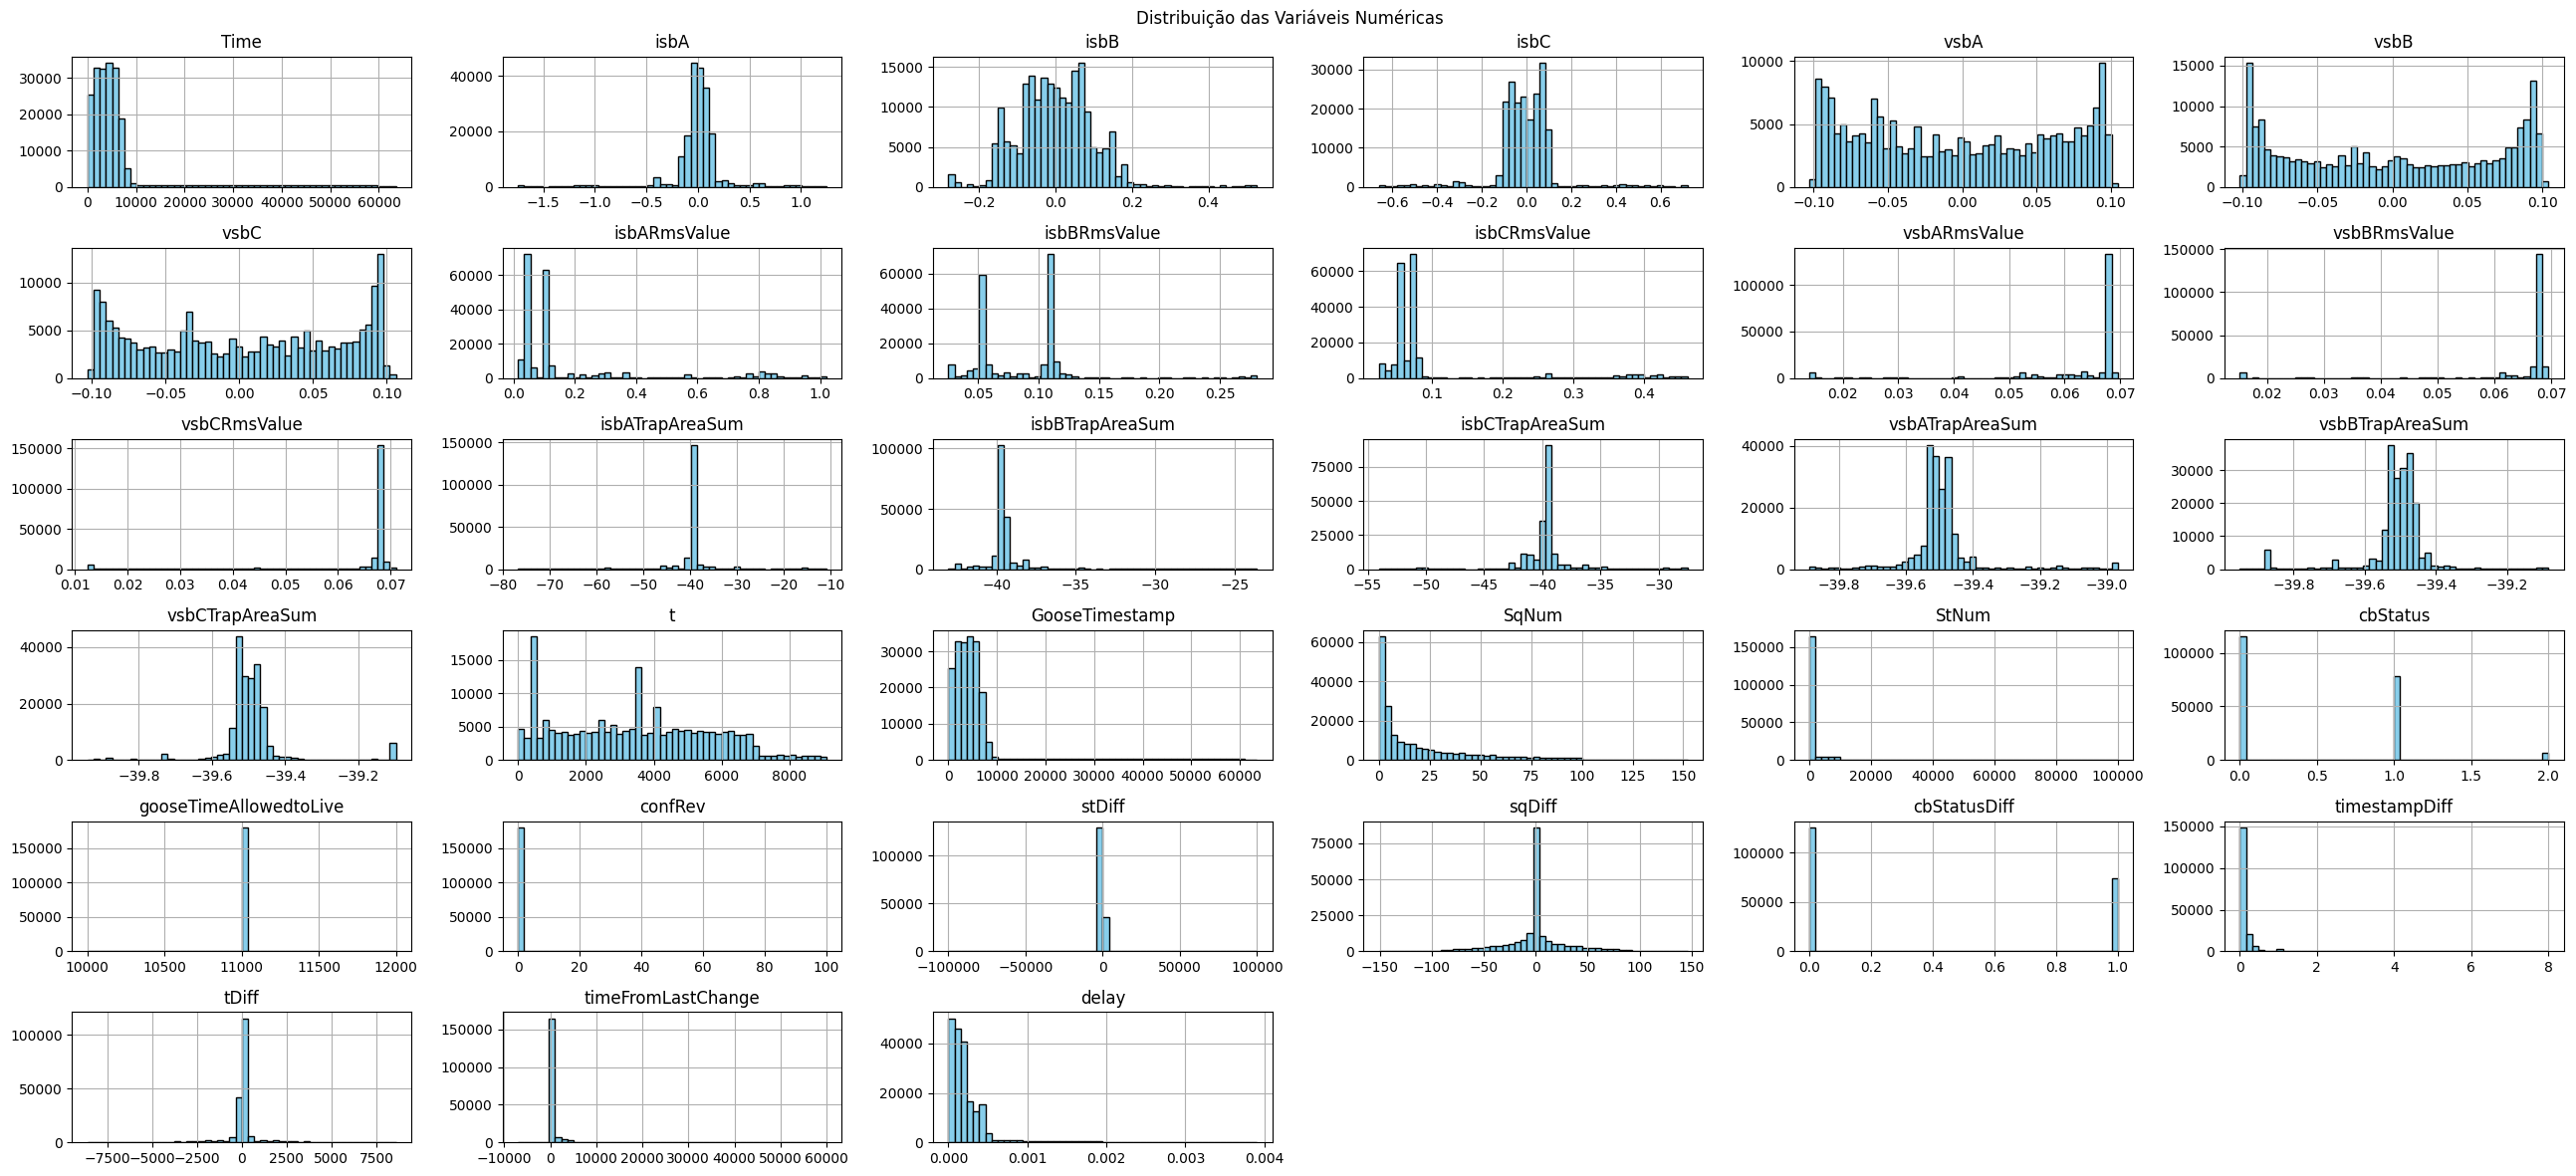

In [ ]:
import matplotlib.pyplot as plt

#df_clean_2.hist(bins=20, color='skyblue', edgecolor='black', figsize=(12, 10), column='timeFromLastChange')
#df_clean_2.hist(bins=50, color='skyblue', edgecolor='black', xlabelsize=10, figsize=(26, 12))
df_clean_2.hist(bins=50, color='skyblue', edgecolor='black', xlabelsize=10, figsize=(26, 12))

plt.suptitle('Distribuição das Variáveis Numéricas')
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'timeFromLastChange'}>]], dtype=object)

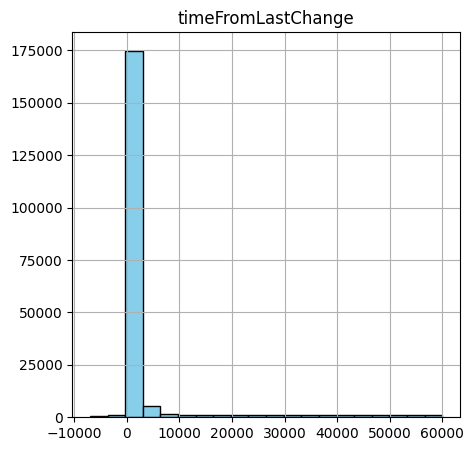

In [ ]:
df_clean_2.hist(bins=20, color='skyblue', edgecolor='black', figsize=(5, 5), column='timeFromLastChange')


array([[<Axes: title={'center': 'confRev'}>]], dtype=object)

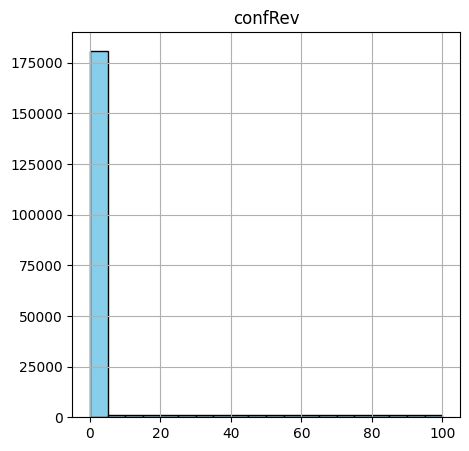

In [ ]:
df_clean_2.hist(bins=20, color='skyblue', edgecolor='black', figsize=(5, 5), column='confRev')


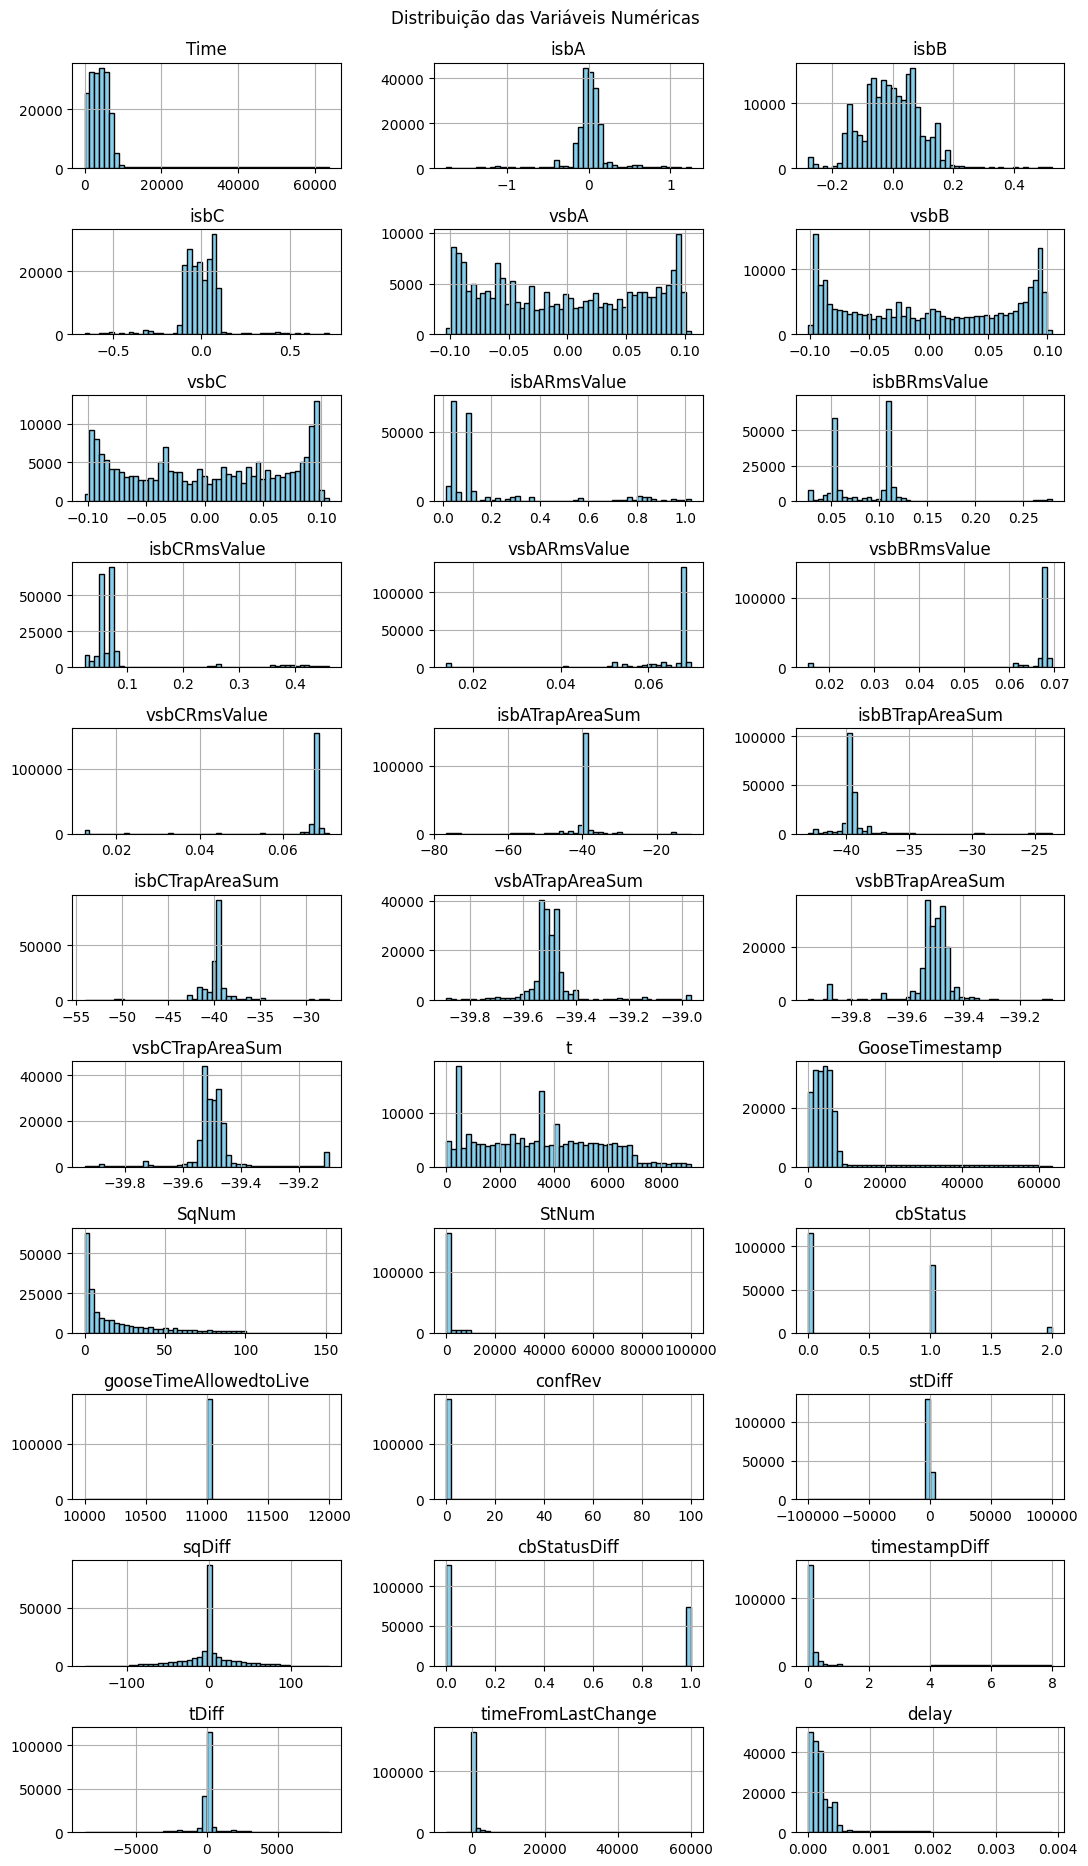

In [ ]:
df_clean_2.hist(figsize=(11, 19), layout=(11, 3), bins=50, edgecolor='black', color='skyblue')

plt.suptitle('Distribuição das Variáveis Numéricas\n')
plt.tight_layout() # Adjust layout to prevent title overlap
plt.show()


In [ ]:
import seaborn as sns

# Scatter plots
sns.pairplot(df_clean_2, diag_kind='kde')
plt.suptitle('Relações entre Variáveis (scatter plots)', y=1.02)
plt.show()


# Chek duplicated lines

In [ ]:
duplicate_row = df_clean_2[df_clean_2.duplicated()]
duplicate_row


,Time,isbA,isbB,isbC,vsbA,vsbB,vsbC,isbARmsValue,isbBRmsValue,isbCRmsValue,...,gooseTimeAllowedtoLive,confRev,stDiff,sqDiff,cbStatusDiff,timestampDiff,tDiff,timeFromLastChange,delay,class
14750,1420.5103,-0.419939,0.049292,0.095885,-0.057277,-0.024176,0.094841,0.229943,0.091407,0.068763,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.004,0.000056,normal
67645,5458.5103,-0.419939,0.049292,0.095885,-0.057277,-0.024176,0.094841,0.229943,0.091407,0.068763,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.004,0.000056,normal
67656,5458.5390,0.087939,-0.135703,-0.016941,-0.030745,0.088267,-0.037961,0.375662,0.072284,0.084496,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.033,0.000247,normal
67679,5458.6060,0.641637,-0.033266,-0.314103,-0.059388,0.094134,-0.028948,0.807083,0.105048,0.391480,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000353,normal
126790,2362.5060,0.021239,-0.146072,0.055829,-0.044915,0.085480,-0.033386,0.192410,0.083319,0.065051,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000206,grayhole
126791,2362.5103,-0.419939,0.049292,0.095885,-0.057277,-0.024176,0.094841,0.229943,0.091407,0.068763,...,11000.0,1.0,0.0,1.0,0.0,0.004,0.0,0.004,0.000056,normal
126792,2362.5103,-0.419939,0.049292,0.095885,-0.057277,-0.024176,0.094841,0.229943,0.091407,0.068763,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.004,0.000056,grayhole
126795,2362.5393,0.087939,-0.135703,-0.016941,-0.030745,0.088267,-0.037961,0.375662,0.072284,0.084496,...,11000.0,1.0,0.0,1.0,0.0,0.025,0.0,0.033,0.000003,grayhole
126796,2362.5393,0.087939,-0.135703,-0.016941,-0.030745,0.088267,-0.037961,0.375662,0.072284,0.084496,...,11000.0,1.0,0.0,0.0,0.0,0.000,0.0,0.033,0.000003,normal
126801,2362.6100,0.254370,-0.280967,-0.033508,-0.087483,-0.018146,0.090788,0.778014,0.109190,0.377037,...,11000.0,1.0,0.0,1.0,0.0,0.004,0.0,0.004,0.000203,normal


In [ ]:
len(duplicate_row)


23

In [ ]:
duplicate_values = df_clean_2.duplicated()
duplicate_values

val = 0
count = 0
for i in duplicate_values:
    if i:
        print(f"{val} ", end='')
        count = count + 1
    val = val + 1

print(f"\ncount: {count} ")


14750 67645 67656 67679 126790 126791 126792 126795 126796 126801 126802 126803 126804 126805 126806 126809 154036 154043 154054 154069 175474 175475 175494 
count: 23 


In [ ]:
df_no_dup = df_clean_2.drop_duplicates(keep='first')
df_no_dup.shape

# Only 23 lines, not droping this lines
#199974 = 199997 - 23


(199974, 34)

# Check target values whitout label/value

In [ ]:
# Drop lines without value in class 'class'
df_test = df_clean_2.dropna(subset=['class'])
df.shape


(199997, 34)

# Check type of columns

In [ ]:
import numpy as np

numeric_cols     = df_clean_2.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean_2.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"{len(numeric_cols)} colunas numéricas e {len(categorical_cols)} colunas categóricas")


33 colunas numéricas e 1 colunas categóricas
